In [47]:
abs_path = r'C:\Users\Assel\Downloads\SUB_ML1.csv'
from pandas import read_csv
df = read_csv(abs_path)
df.head(2)

,VAR1,VAR2,VAR3,LABEL1
0,1,1,1,98.0
1,2,1,1,-2.0


In [50]:
from numpy import reshape
X = df['VAR1'].values
y = df['LABEL1'].values
X = X.reshape(-1,1)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
RANDOM_STATES = 1234
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state= RANDOM_STATES,shuffle = True)

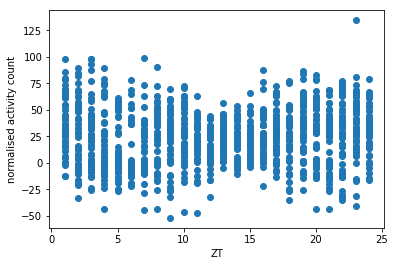

In [51]:
%matplotlib inline
from matplotlib.pyplot import subplots
fig, ax = subplots()

ax.scatter(X,y)
ax.set_xlabel('ZT')
ax.set_ylabel('normalised activity count')

fig.savefig(r'C:\Users\Assel\Desktop\foo.png')

In [52]:
clf = RandomForestRegressor()
X_train
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

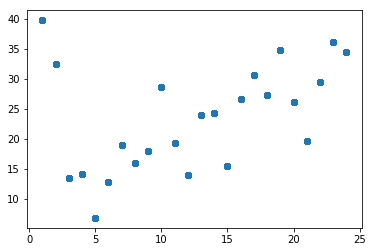

In [53]:
yy_test = clf.predict(X_test)
%matplotlib inline
from matplotlib.pyplot import subplots

fig, ax = subplots()

ax.scatter(X_test,yy_test)

In [54]:
clf.score(X_test,y_test)

-0.021121017127631925

-5.177700222123899e+31

In [55]:
from numpy import meshgrid
v1 = df['VAR1'].values
v2 = df['VAR3'].values
#v3= 1
#v3 = v3.astype(int)

v1 = v1.reshape(-1,1)
v2 = v2.reshape(-1,1)
#v3 = v3.reshape(-1,1)
v1.shape

from numpy import concatenate

y = df['LABEL1'].values

X = concatenate((v1,v2), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state= RANDOM_STATES,shuffle = True)
clf = RandomForestRegressor()
y_train
clf.fit(X_train,y_train)
#yy_test = clf.predict(X_test)
#X_test.shapefrom numpy import meshgrid


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
from numpy import mgrid


grid_step = 0.01

grid_a, grid_b = mgrid[1:24:grid_step, 1:96:grid_step]


print('Grid A shape:', grid_a.shape, '- size:', grid_a.size)
print('Grid B shape:', grid_b.shape, '- size:', grid_b.size)

from numpy import c_

grid_a_flat = grid_a.ravel()
grid_b_flat = grid_b.ravel()


new_obs = c_[grid_a_flat, grid_b_flat]


print('Shape:', new_obs.shape, '- size:', new_obs.size)

Grid A shape: (2300, 9500) - size: 21850000
Grid B shape: (2300, 9500) - size: 21850000
Shape: (21850000, 2) - size: 43700000


In [57]:
predictions = clf.predict(new_obs)

Predictions shape: (21850000,)
Predictions grid shape: (2300, 9500)


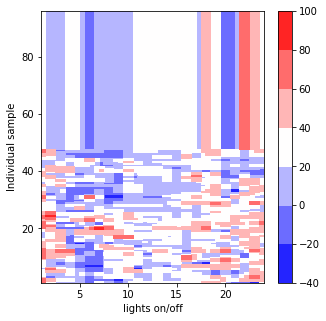

In [58]:
grid_shape = grid_a.shape

predictions_grid = predictions.reshape(grid_shape)

print('Predictions shape:', predictions.shape)
print('Predictions grid shape:', predictions_grid.shape)
fig, ax = subplots(figsize=(5, 5))

cax = ax.contourf(grid_a, grid_b, predictions_grid, cmap='bwr')

ax.set_xlabel('lights on/off')
ax.set_ylabel('Individual sample');
fig.colorbar(cax)

In [59]:
clf.feature_importances_

array([0.39571652, 0.60428348])

In [60]:
clf.score(X_test,y_test)

-0.0843230253784073

In [37]:
#SIMPLE LINEAR REGRESSION ALGORITHM 

X = df['VAR1'].values # ZT independant variable
y = df['LABEL'].values  # subtracted activity count
X = X.reshape(-1,1)
from sklearn.model_selection import train_test_split
RANDOM_STATES = 1234
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state= RANDOM_STATES,shuffle = True)

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

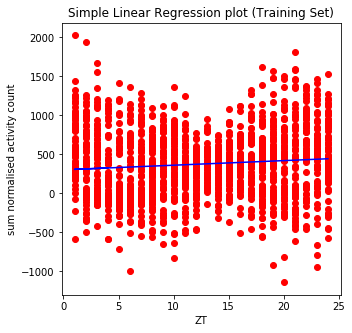

In [21]:
y_predict = regressor.predict(X_test)

0.010210179496233596


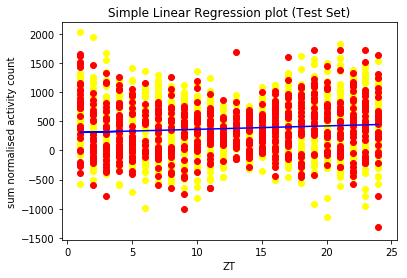

In [45]:
#fig, ax = subplots(figsize=(5, 5), ncols = 2, nrows= 1, sharey = True, sharex= True)
#plots_tot = 2
#for x < plots_tot:
    #ax = fig.subplot(nrows, ncols, x+1)
fig, ax = subplots()
ax.scatter(X_train, y_train, color = 'yellow')
ax.scatter(X_test, y_test, color = 'red')
ax.plot(X_train,regressor.predict(X_train), color = 'blue')
ax.set_title('Simple Linear Regression plot (Test Set)')
ax.set_xlabel('ZT')
ax.set_ylabel('sum normalised activity count')

simple_regressor_score = regressor.score(X_test,y_test)
print(simple_regressor_score)

In [47]:
#MULTIPLE LINEAR REGRESSION ALGORITHM 

v1 = df['VAR1'].values
v2 = df['VAR2'].values
v1 = v1.reshape(-1,1)
v2 = v2.reshape(-1,1)

v1.shape

from numpy import concatenate

X = concatenate((v1,v2), axis=1)
y = df['LABEL'].values  # subtracted activity count
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state= RANDOM_STATES,shuffle = True)

In [50]:
multi_regressor = LinearRegression()

multi_regressor.fit(X_train, y_train)
multi_regressor_score = multi_regressor.score(X_test, y_test)
print(multi_regressor_score)

0.0150720155648284


In [86]:
#POLYNOMIAL LINEAR REGRESSION ALGORITHM 
X = df['VAR1'].values # ZT independant variable
y = df['LABEL'].values  # subtracted activity count
X = X.reshape(-1,1)


X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=.3, random_state= RANDOM_STATES,shuffle = True)
lin_reg = LinearRegression()
lin_reg.fit(X_train1,y_train1)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=.3, random_state= RANDOM_STATES,shuffle = True)


lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train,y_train)

poly_regressor_score = lin_reg_2.score(X_test,y_test)
print(poly_regressor_score)

0.04352898416502904


In [87]:
X_train.shape

(1612, 6)

Text(0,0.5,'sum normalised activity count')

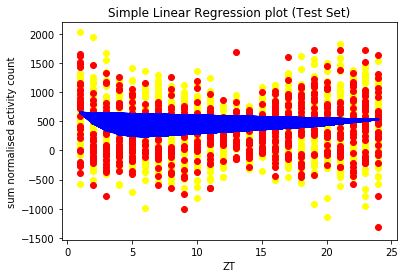

In [88]:
fig, ax = subplots()
ax.scatter(X_train1, y_train1, color = 'yellow')
ax.scatter(X_test1, y_test1, color = 'red')
ax.plot(X_train1,lin_reg_2.predict(poly_reg.fit_transform(X_train1)), color = 'blue')
ax.set_title('Simple Linear Regression plot (Test Set)')
ax.set_xlabel('ZT')
ax.set_ylabel('sum normalised activity count')

In [111]:
#SVR REGRESSION ALGORITHM 

from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')

v1 = df['VAR1'].values
v2 = df['VAR2'].values
v1 = v1.reshape(-1,1)
v2 = v2.reshape(-1,1)

v1.shape

from numpy import concatenate

#X = concatenate((v1,v2), axis=1)
X = df['VAR1'].values
y = df['LABEL'].values  # subtracted activity count
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state= RANDOM_STATES,shuffle = True)

y_train = y_train.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_train = y_train.ravel()

/Users/asselkashkenbayeva/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [112]:
svr_regressor.fit(X_train, y_train)
svr_regressor_score = svr_regressor.score(X_test, y_test)
print(svr_regressor_score)

-0.6708037533752056


Text(0,0.5,'sum normalised activity count')

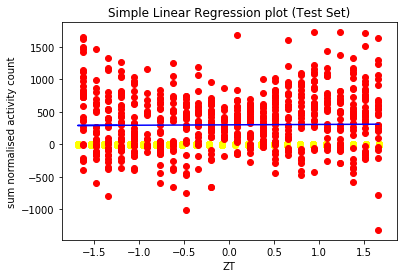

In [113]:
fig, ax = subplots()
ax.scatter(X_train, y_train, color = 'yellow')
ax.scatter(X_test, y_test, color = 'red')
ax.plot(X_train,regressor.predict(X_train), color = 'blue')
ax.set_title('Simple Linear Regression plot (Test Set)')
ax.set_xlabel('ZT')
ax.set_ylabel('sum normalised activity count')


-0.6691633314858603


/Users/asselkashkenbayeva/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/asselkashkenbayeva/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0,0.5,'sum normalised activity count')

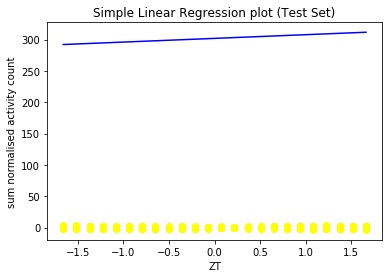

In [119]:
#SVR REGRESSION ALGORITHM 

from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')

v1 = df['VAR1'].values
v2 = df['VAR2'].values
v1 = v1.reshape(-1,1)
v2 = v2.reshape(-1,1)

v1.shape

from numpy import concatenate

#X = concatenate((v1,v2), axis=1)
X = df['VAR1'].values
y = df['LABEL'].values  # subtracted activity count
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state= RANDOM_STATES,shuffle = True)

y = y.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y)
#y_train = y_train.ravel()

svr_regressor.fit(X_train, y_train)
svr_regressor_score = svr_regressor.score(X_test, y_test)
print(svr_regressor_score)

fig, ax = subplots()
ax.scatter(X_train, y_train, color = 'yellow')
ax.plot(X_train,regressor.predict(X_train), color = 'blue')
ax.set_title('Simple Linear Regression plot (Test Set)')
ax.set_xlabel('ZT')
ax.set_ylabel('sum normalised activity count')


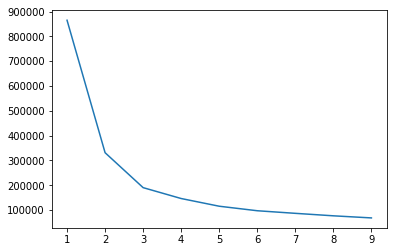

In [62]:
from sklearn.cluster import KMeans
wcss = []
RANDOM_STATES = 1234
X = df.iloc[:,[0,3]].values
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = RANDOM_STATES)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

fig, ax = subplots()
ax.plot(range(1,10),wcss)


In [63]:
 kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = RANDOM_STATES)
y_kmeans = kmeans.fit_predict(X)


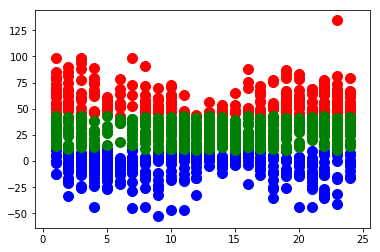

In [64]:
fig,ax = subplots()
ax.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c= 'red', label = 'Cluster1')
ax.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c= 'blue', label = 'Cluster3')
ax.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c= 'green', label = 'Cluster2')

In [65]:
kmeans.score(X)

-190006.45836708724